## Task 1 - Prediction using Supervised ML - Linear Regression

Here we have to predict the percentage of a particular student based on the number of hours he/she studies. It is a simple linear regression task as it involves just 2 variables.

Q) What will be predicted score if a student studies for 9.25 hrs/ day? 


### Created By: Aditya Agarwal

In [27]:
# To Import all libraries
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

%matplotlib inline

In [28]:
# Reading data from remote link

student_data = pd.read_csv("D:\Jupyter Notebooks\TSF_Internship\dataset/student_score.csv")

print("Successfully Imported The Data")

Successfully Imported The Data


In [29]:
# To check the first 5 rows of our dataset
student_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
# To check the shape of the dataset
student_data.shape

(25, 2)

In [32]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, we can find the relationship between the numbers of "hours" studied and the percentage of possible "scores" achieved by the student. 
We are also determining the appropriate title, xlabel and ylabel of our plot.

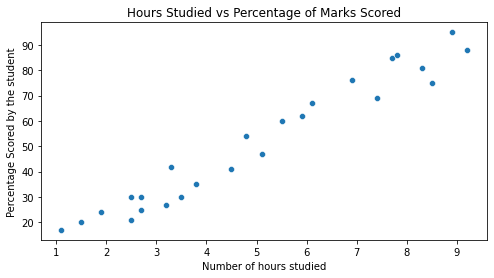

In [33]:
# Using a Scatterplot to know more about the relationship between "hours" and "Scores"
plt.figure(figsize=(8,4))

sns.scatterplot(x=student_data['Hours'], y=student_data['Scores'])
# label x axis
plt.xlabel('Number of hours studied')  
# label y axis
plt.ylabel('Percentage Scored by the student')  
# add title
plt.title('Hours Studied vs Percentage of Marks Scored')  
plt.show()

There is a positive Coorelation between the number of hours studied and percentage of marks scored by the student.

## To Segregate the Data into Training Data And Testing Data

We want to predict the percentage score depending upon the nuumber of hours studied by the student. Therefore our "Attribute" set will consist of the "Hours" column, and the "Label" set will be the "Score" column.

In [34]:
# Selecting the values based on position
x = student_data.iloc[:, :-1].values  # Selecting the First Columns
y = student_data.iloc[:, 1].values  # Selecting the Second Column

print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [35]:
# importing "train_test_split" module from "sklearn.model_selection" Library

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

print("Successfully segregated the data into Training and Testing data")

Successfully segregated the data into Training and Testing data


## Training the Model Using Linear Regression Algorithm
 

In [36]:
# Importing "LinearRegression" Module from "sklearn.linear_model" Library 
model = LinearRegression()

# Fitting the Linear Model
model.fit(x_train, y_train) 

print("Successfully Trained the Model")

Successfully Trained the Model


In [37]:
# To know the value of the intercept calculated by the Regression Model
print("Intercept Value:", model.intercept_)

# To know the value of Slope calculated by the Regression Model
print("Value Of Slope:", model.coef_)

Intercept Value: 2.0181600414346974
Value Of Slope: [9.91065648]


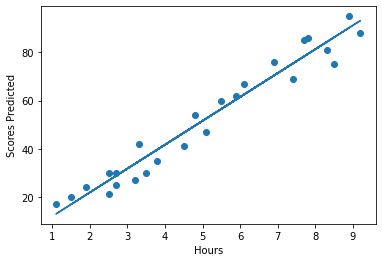

In [38]:
# To plot the regression line

line = model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.xlabel("Hours")
plt.ylabel("Scores Predicted")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [40]:
# To print the Testing Data
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [41]:
# Predicting the scores where y_pred contains all the predicted values
y_pred = model.predict(x_test) 
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [42]:
# Comparing Actual vs Predicted
comp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We can see that the predicted percentages are close to the actual ones, although the model is not very precise.

In [43]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


## Evaluating the model

For regression algorithms, three evaluation metrics are commonly used: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

In [44]:
# Importing "Metrics" module from "sklearn" Library

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


## Q) What will be predicted score if a student studies for 9.25 hrs/ day?

In [45]:
print("If the student studies for 9.25hrs everyday then he will score {}".format(model.predict([[9.25]])), "approximately.")

If the student studies for 9.25hrs everyday then he will score [93.69173249] approximately.
